In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.svm import SVR
from math import sqrt
% matplotlib inline

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M'])

In [2]:
df_s.shape

(5686, 25)

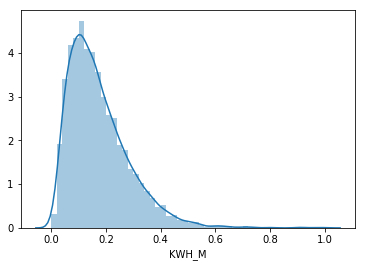

In [3]:
# Check Density Plot for Target Variable
ax = sns.distplot(df_s.KWH_M)
plt.show()

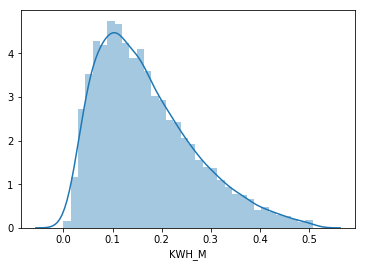

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
df_s.shape

(5618, 25)

In [6]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

# Split data into training and testing sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# GridSearchCV - Support Vector Regression

Cs = [10, 100]
gammas = [0.001, 0.01, 0.1, 1]
parameters = {'C': Cs, 'gamma' : gammas}
grid_obj = GridSearchCV(SVR(kernel='linear'), parameters, cv=3)
grid_obj.fit(X, Y)

results = pd.DataFrame(grid_obj.cv_results_)

print(pd.DataFrame(results))
print("best_index", grid_obj.best_index_)
print("best_score", grid_obj.best_score_)
print("best_params", grid_obj.best_params_)


   mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       0.381608         0.010553         0.774177          0.779407      10   
1       0.375916         0.007160         0.774177          0.779407      10   
2       0.378285         0.007132         0.774177          0.779407      10   
3       0.397123         0.007181         0.774177          0.779407      10   
4       1.808181         0.007172         0.774696          0.780196     100   
5       1.790735         0.007122         0.774696          0.780196     100   
6       1.804002         0.007122         0.774696          0.780196     100   
7       1.824647         0.007135         0.774696          0.780196     100   

  param_gamma                      params  rank_test_score  split0_test_score  \
0       0.001   {'C': 10, 'gamma': 0.001}                5           0.778641   
1        0.01    {'C': 10, 'gamma': 0.01}                5           0.778641   
2         0.1     {'C': 10, 'gamma':

/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/willi

In [8]:
# Calculate RMSE 

svr = SVR(kernel='linear', gamma = 0.001, C= 100)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

mse_scores = cross_val_score(svr, X, Y, cv=shuffle, scoring = "neg_mean_squared_error")
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)
print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))

The RMSE scores are [0.04682166 0.04607125 0.04926107 0.04596689 0.04607065 0.04635548
 0.04533391 0.04536707 0.04963498 0.04550147]
The mean of the RMSE scores is 0.046638


In [9]:
# Calculate MAE 
from sklearn.metrics import mean_absolute_error

svr = SVR(kernel='linear', gamma = 0.001, C= 100)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

mae_scores = cross_val_score(svr, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores1 = -mae_scores 

print ("The mean absolute error scores are %s" 
       % (mae_scores1))
print ("The mean of the mean absolute scores is %f" 
       %(mae_scores1.mean()))

The mean absolute error scores are [0.03647099 0.03645594 0.03733351 0.03655413 0.03517675 0.03595405
 0.03464145 0.03536696 0.03963644 0.03526162]
The mean of the mean absolute scores is 0.036285


In [10]:
# Calculate VAR

from sklearn.metrics import explained_variance_score
svr = SVR(kernel='linear', gamma = 0.001, C= 100)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

ev_scores = cross_val_score(svr, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of explained variance scores is %f" 
       %(ev_scores.mean()))

The explained variance scores are [0.79062269 0.81750848 0.78475445 0.79500082 0.79428836 0.78441237
 0.79425134 0.82624064 0.78550738 0.83470356]
The mean of explained variance scores is 0.800729


In [11]:
# R2 Scores 
from sklearn.metrics import mean_absolute_error

svr = SVR(kernel='linear', gamma = 0.001, C= 100)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

r_scores = cross_val_score(svr, X, Y, cv=shuffle, scoring = "r2")
print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

The R2 scores are [0.77373095 0.80041624 0.77096857 0.77346725 0.77835266 0.75576705
 0.77988679 0.79958669 0.75062635 0.81449578]
The mean of the R2 scores is 0.779730


Text(0.5,1,'Support Vector Regression')

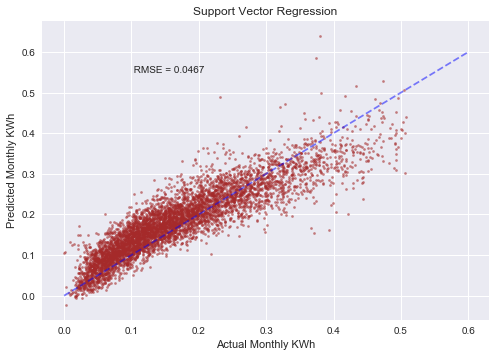

In [13]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_svr = cross_val_predict(svr, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_svr, s = 5, color = 'brown', alpha = 0.6)
plt.plot([0,0.6], [0,0.6], "b--", color = "blue", alpha = 0.5)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_svr)), 4)))
plt.title('Support Vector Regression')